# Weather Analysis

This dataset contains the weather changes of weather in Szeged,Hungary from year 2006 to 2016. It has 12 columns and 96453 rows. 

Source: https://www.kaggle.com/budincsevity/szeged-weather

### Importing data, Cleaning data and formatting dataset 

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [7]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [33]:
df['Formatted Date'] = df['Formatted Date'].str.split(" ").str[0].str.split("-").str[0]
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [34]:
df['Formatted Date'].value_counts()

2016    8784
2012    8784
2008    8784
2010    8784
2009    8760
2007    8760
2013    8760
2011    8760
2006    8760
2015    8760
2014    8757
Name: Formatted Date, dtype: int64

In [35]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [45]:
df = df.rename(columns={"Formatted Date":"Year"})
df.head()

,Year,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [60]:
df = df.drop(['Loud Cover'],axis=1)
df.head()

,Year,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## Analysis for year 2006

In [61]:
a = df[df['Year']=='2016']
a.shape

(8784, 11)

In [62]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 87669 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8410 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   int64  
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.5+ KB


In [63]:
a['Temperature (C)'].mean()

11.98529207144012

In [64]:
a['Wind Speed (km/h)'].mean()

10.703440926684888

In [65]:
a.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.985292,10.832629,0.760874,10.703441,185.438069,11.249668,1015.162161
std,9.031028,10.232430,0.182259,6.148946,101.045234,4.550629,34.916543
min,-10.133333,-17.222222,0.230000,0.000000,0.000000,0.000000,0.000000
25%,4.788889,2.255556,0.650000,6.359500,132.000000,8.404200,1012.900000
50%,11.086111,11.086111,0.810000,10.062500,175.000000,10.352300,1017.080000
75%,18.800000,18.800000,0.900000,13.894300,275.000000,15.649200,1019.980000
max,34.811111,37.005556,1.000000,38.833200,359.000000,16.100000,1038.010000


In [56]:
temp_range_2006 = a['Temperature (C)'].max() - a['Temperature (C)'].min()
temp_range_2006

44.94444444

This shows that the range of the temperature was from -10<sup>o</sup>C to 34.8<sup>o</sup>C i.e. there was change in temperature of ~45<sup>o</sup>C

In [55]:
humidity_range_2006 = a['Humidity'].max() - a['Humidity'].min()
humidity_range_2006

0.77

This shows that the range of the humidity was from 0.76 to 1 i.e. there was change in humidity of 0.77.

Similarly the range of the pressure was from 0(millibars) to 1038.01(millibars) i.e. there was change in pressure of 1038.01(milibars)

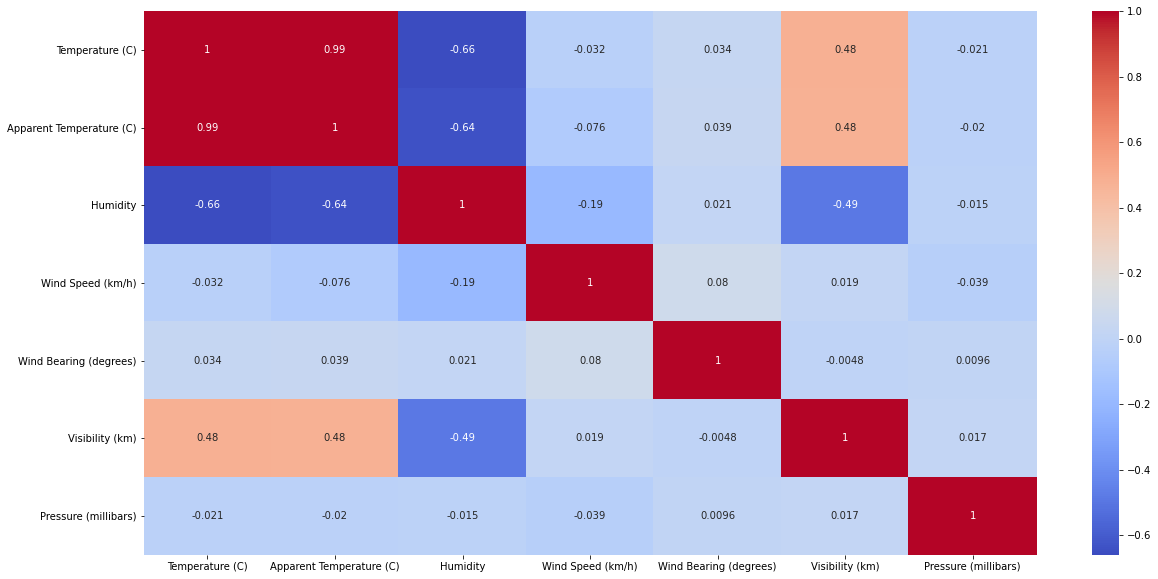

In [74]:
plt.figure(figsize=[20,10])
sns.heatmap(a.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.48
- Wind Bearing and Wind Speed : 0.08

<b>Negative Correlation</b>

- Pressure and Temperature : -0.021

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes drastically.

The negative relationship shows that with increase in temperature the pressure decreased in 2006.

## Analysis of year 2007

In [67]:
b = df[df['Year']=='2007']
b.shape

(8760, 11)

In [68]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 8784 to 17543
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   int64  
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [69]:
b.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.135239,11.063135,0.689652,10.825392,194.119292,10.408191,1001.640226
std,9.384045,10.283586,0.199648,6.970801,105.558299,3.647454,125.100009
min,-10.155556,-12.422222,0.130000,0.000000,0.000000,0.000000,0.000000
25%,5.033333,2.888889,0.550000,5.747700,123.000000,9.901500,1011.840000
50%,11.138889,11.138889,0.740000,9.788800,198.000000,10.030300,1016.510000
75%,18.800000,18.800000,0.850000,14.200200,290.000000,11.447100,1022.260000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,1041.650000


In [70]:
temp_range_2007 = b['Temperature (C)'].max() - b['Temperature (C)'].min()
temp_range_2007

50.06111112000001

This shows that the range of the temperature was from -10.15<sup>o</sup>C to 39.9<sup>o</sup>C i.e. there was change in temperature of ~50<sup>o</sup>C.

We can say that there is a change of ~5<sup>o</sup>C from 2006 to 2007 in the maximum temperature.

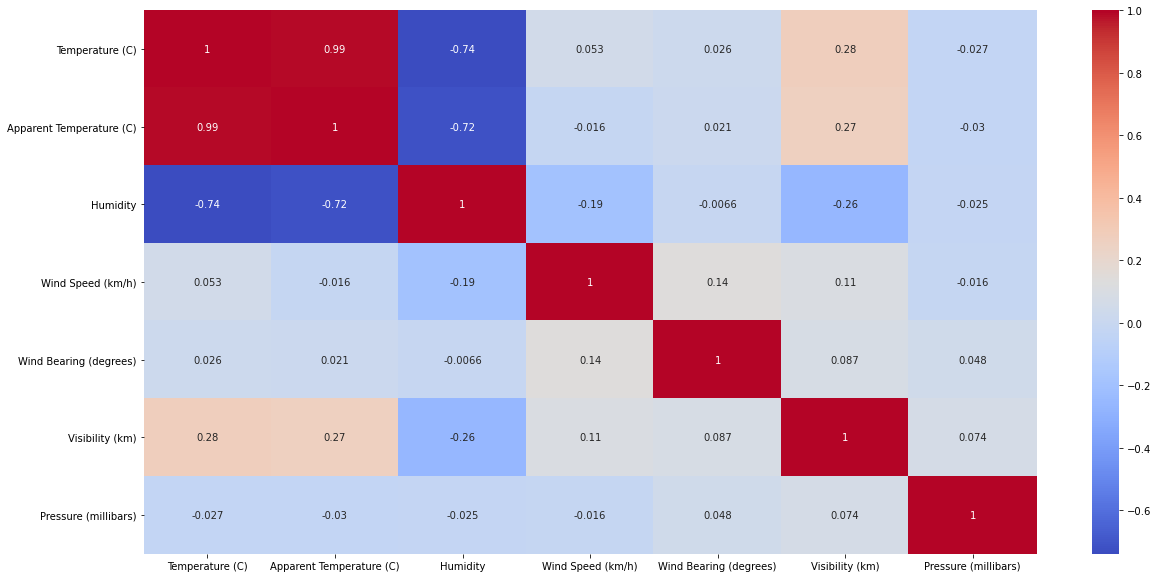

In [75]:
plt.figure(figsize=[20,10])
sns.heatmap(b.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.28
- Wind Bearing and Wind Speed : 0.14

<b>Negative Correlation</b>

- Pressure and Temperature : -0.027

The positive relationship shows that with the increase in the temperature there is a increase in visibility which as compared to 2006 has decreased. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes drastically and is more than that of 2006.

The negative relationship shows that with increase in temperature the pressure decreased in 2007.

## Analysis of year 2008

In [84]:
c = df[df['Year']=='2008']
c.shape

(8784, 11)

In [85]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 17544 to 26327
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8784 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   int64  
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.5+ KB


In [87]:
c.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,12.161876,11.053184,0.701237,11.303897,193.825250,10.267119,1007.734504
std,9.177110,10.245629,0.184550,7.038308,103.773725,3.568314,98.204907
min,-11.127778,-17.261111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.583333,3.015278,0.570000,6.230700,130.000000,9.901500,1011.580000
50%,11.577778,11.577778,0.740000,10.642100,190.000000,9.982000,1016.550000
75%,18.656944,18.656944,0.850000,14.441700,291.000000,11.342450,1022.252500
max,37.755556,36.855556,1.000000,55.931400,359.000000,16.100000,1046.380000


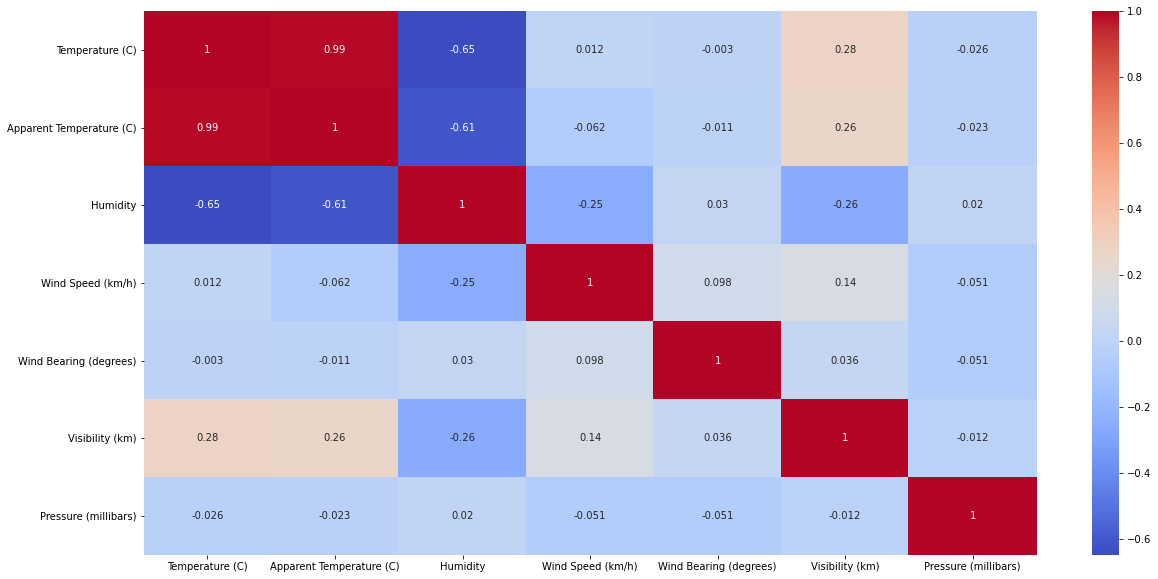

In [88]:
plt.figure(figsize=[20,10])
sns.heatmap(c.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.28
- Wind Bearing and Wind Speed : 0.098

<b>Negative Correlation</b>

- Pressure and Temperature : -0.026

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in temperature the pressure decreased in 2008.

## Analysis of year 2009

In [107]:
d = df[df['Year'] == '2009']
d.shape

(8760, 11)

In [108]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 26328 to 35087
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   int64  
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [109]:
d.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.267910,11.069337,0.707247,11.505948,180.496461,10.001370,1002.608735
std,9.771362,10.969885,0.204392,7.517410,111.844844,3.938705,114.330599
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.427778,0.560000,6.440000,90.000000,9.519125,1011.300000
50%,12.508333,12.508333,0.760000,10.996300,170.000000,9.982000,1016.500000
75%,19.894444,19.894444,0.880000,14.490000,290.000000,11.270000,1019.800000
max,36.111111,36.922222,1.000000,48.300000,359.000000,16.100000,1042.040000


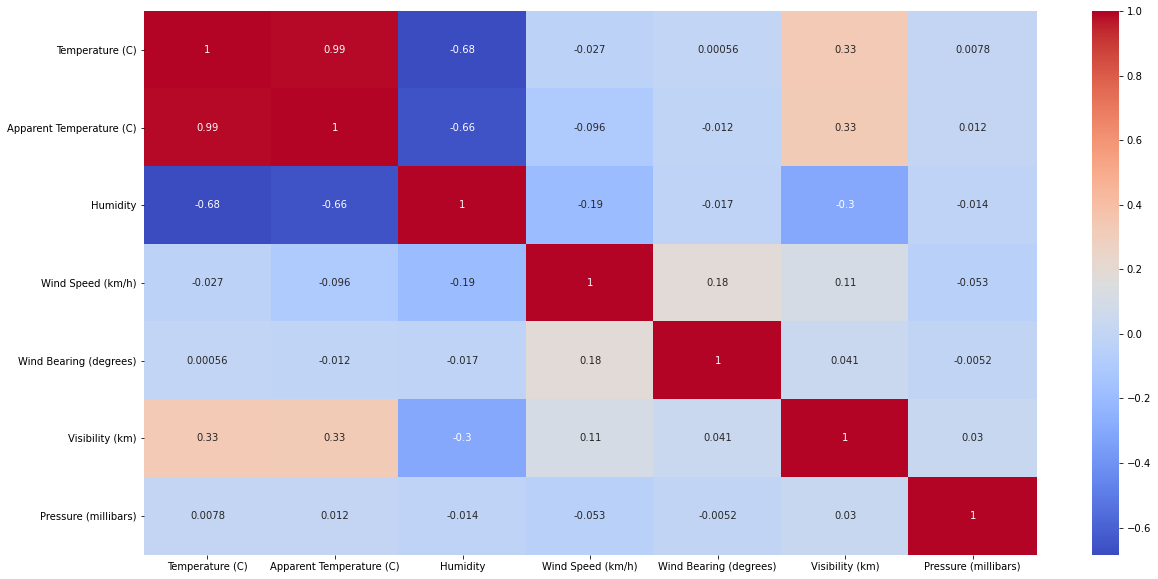

In [110]:
plt.figure(figsize=[20,10])
sns.heatmap(d.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.33
- Wind Bearing and Wind Speed : 0.18

<b>Negative Correlation</b>

- Pressure and Humidity : -0.014

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in the pressure humidity decreased in 2009.

## Analysis of year 2010

In [111]:
e = df[df['Year'] == '2010']
e.shape

(8784, 11)

In [112]:
e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 8040 to 43847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8784 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   int64  
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.5+ KB


In [113]:
e.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.202061,10.098643,0.796858,11.015628,192.067509,9.140810,1004.811891
std,9.649244,11.120552,0.168368,6.856158,108.469171,3.771231,97.234431
min,-15.483333,-21.411111,0.290000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.111111,0.690000,6.101900,114.000000,6.343400,1009.820000
50%,11.975000,11.975000,0.850000,10.465000,183.000000,9.982000,1014.210000
75%,17.800000,17.800000,0.930000,14.200200,299.000000,11.270000,1018.662500
max,34.927778,38.116667,1.000000,46.207000,359.000000,16.100000,1037.850000


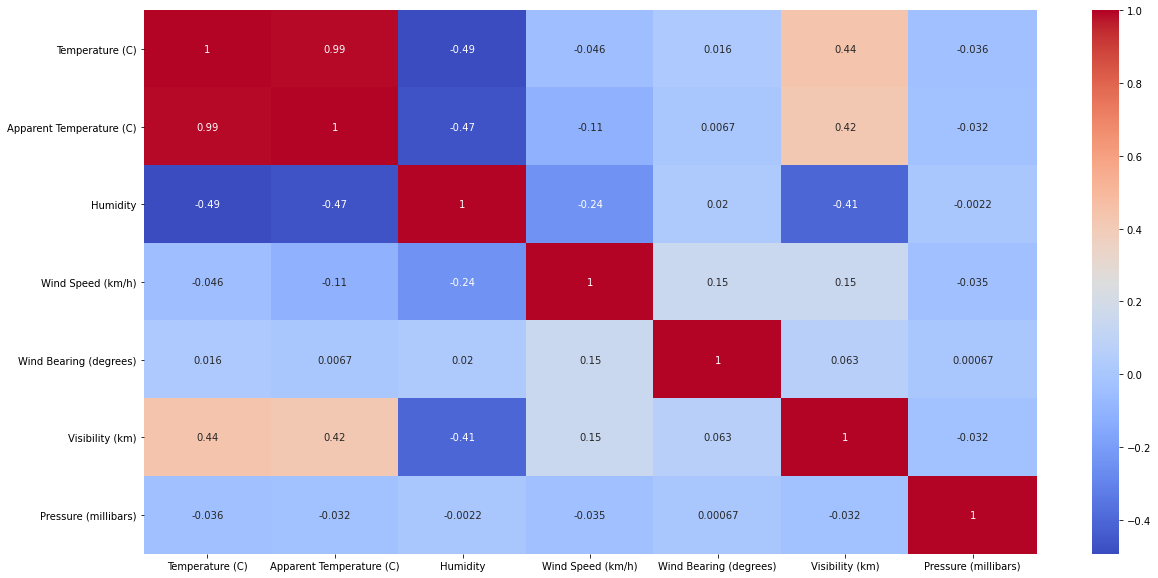

In [114]:
plt.figure(figsize=[20,10])
sns.heatmap(e.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.44
- Wind Bearing and Wind Speed : 0.15

<b>Negative Correlation</b>

- Pressure and Temperature : -0.036

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in temperature the pressure decreased in 2010.

## Analysis of year 2011

In [115]:
f = df[df['Year']=='2011']
f.shape

(8760, 11)

In [116]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 43848 to 52607
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   int64  
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [117]:
f.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.524453,10.584294,0.736017,9.898262,189.342352,9.507929,1014.184075
std,10.139322,11.083158,0.202686,6.655776,109.739120,4.062030,69.925923
min,-11.700000,-12.761111,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.665278,0.783333,0.590000,4.701200,114.000000,7.212800,1013.860000
50%,11.688889,11.688889,0.790000,9.112600,181.000000,9.982000,1018.200000
75%,18.945833,18.945833,0.910000,13.572300,297.000000,11.270000,1023.650000
max,37.800000,37.716667,1.000000,49.394800,359.000000,16.100000,1041.140000


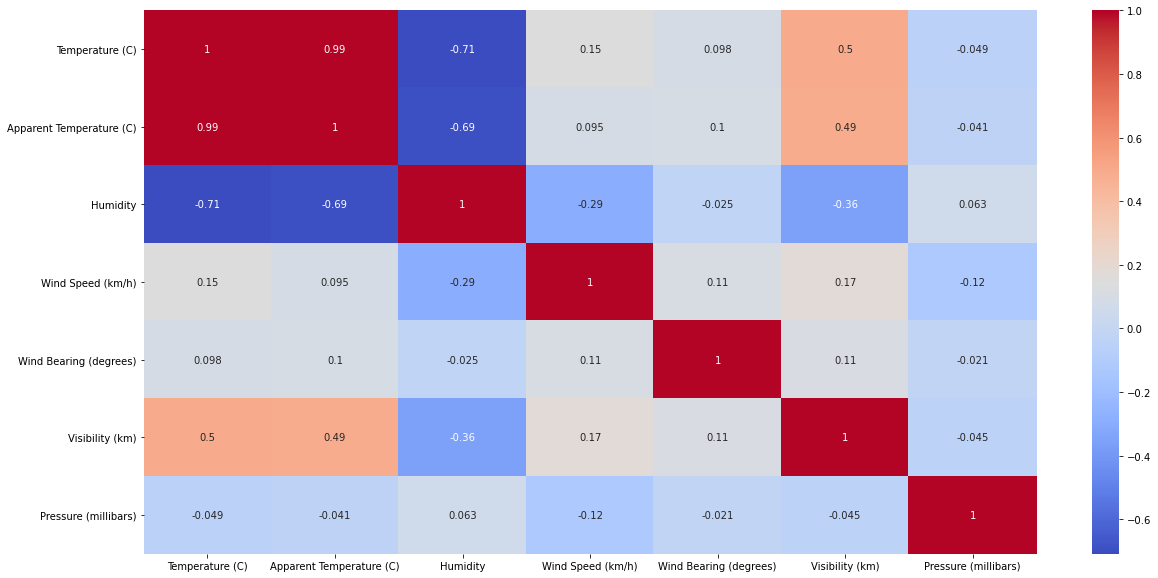

In [118]:
plt.figure(figsize=[20,10])
sns.heatmap(f.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.5
- Wind Bearing and Wind Speed : 0.11

<b>Negative Correlation</b>

- Pressure and Temperature : -0.049

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in temperature the pressure decreased in 2011.

## Analysis of year 2012

In [119]:
g = df[df['Year'] == '2012']
g.shape

(8784, 11)

In [120]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 52608 to 61391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8641 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   int64  
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.5+ KB


In [121]:
g.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.00000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.986726,10.753081,0.68950,11.264545,187.755692,10.363108,999.341481
std,11.021343,12.285058,0.21799,7.169755,109.647557,3.823126,131.949537
min,-21.822222,-27.716667,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.793056,1.204167,0.52750,6.134100,115.000000,9.982000,1011.720000
50%,12.222222,12.222222,0.73000,10.561600,180.000000,9.982000,1016.100000
75%,20.000000,20.000000,0.87000,14.490000,291.000000,11.447100,1021.360000
max,38.861111,37.883333,1.00000,45.080000,359.000000,16.100000,1037.100000


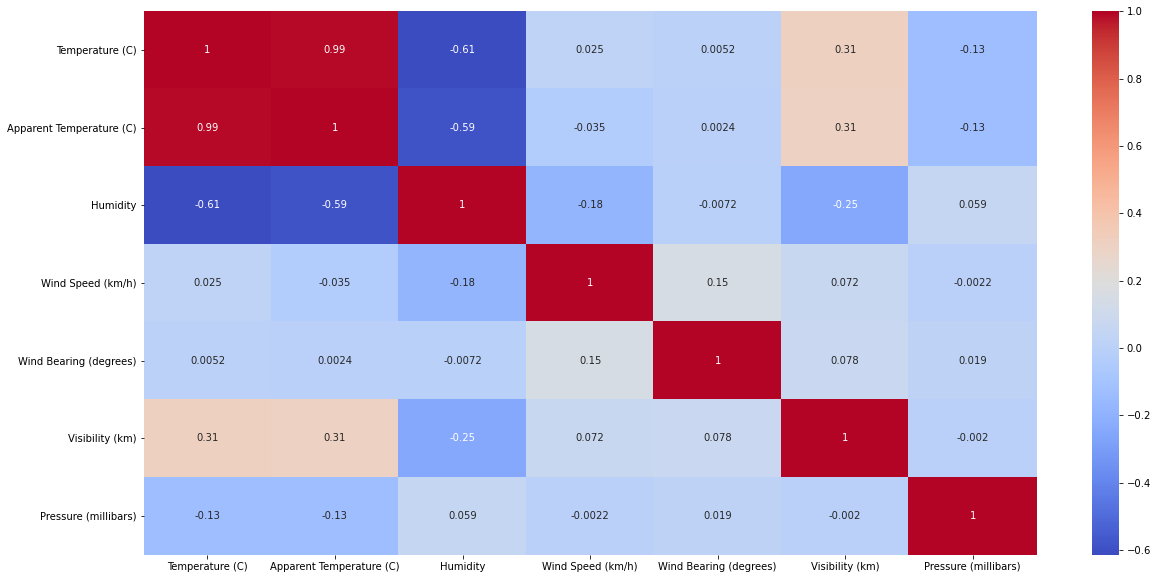

In [122]:
plt.figure(figsize=[20,10])
sns.heatmap(g.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.31
- Wind Bearing and Wind Speed : 0.15

<b>Negative Correlation</b>

- Pressure and Temperature : -0.13

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in temperature the pressure decreased in 2012.

## Analysis of year 2013

In [131]:
h = df[df['Year'] == '2013']
h.shape

(8760, 11)

In [132]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 61392 to 70151
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   int64  
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [133]:
h.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.940719,10.825320,0.754209,10.969389,187.861758,10.892049,1004.950764
std,9.389894,10.565661,0.194935,7.044222,107.407628,4.314109,104.974560
min,-8.983333,-13.888889,0.150000,0.000000,0.000000,0.000000,0.000000
25%,3.943056,1.515278,0.630000,5.872475,111.000000,9.676100,1011.020000
50%,11.941667,11.941667,0.800000,10.207400,183.000000,10.899700,1015.880000
75%,18.750000,18.750000,0.920000,14.216300,290.000000,15.182300,1020.290000
max,37.872222,39.344444,1.000000,50.135400,359.000000,16.100000,1041.930000


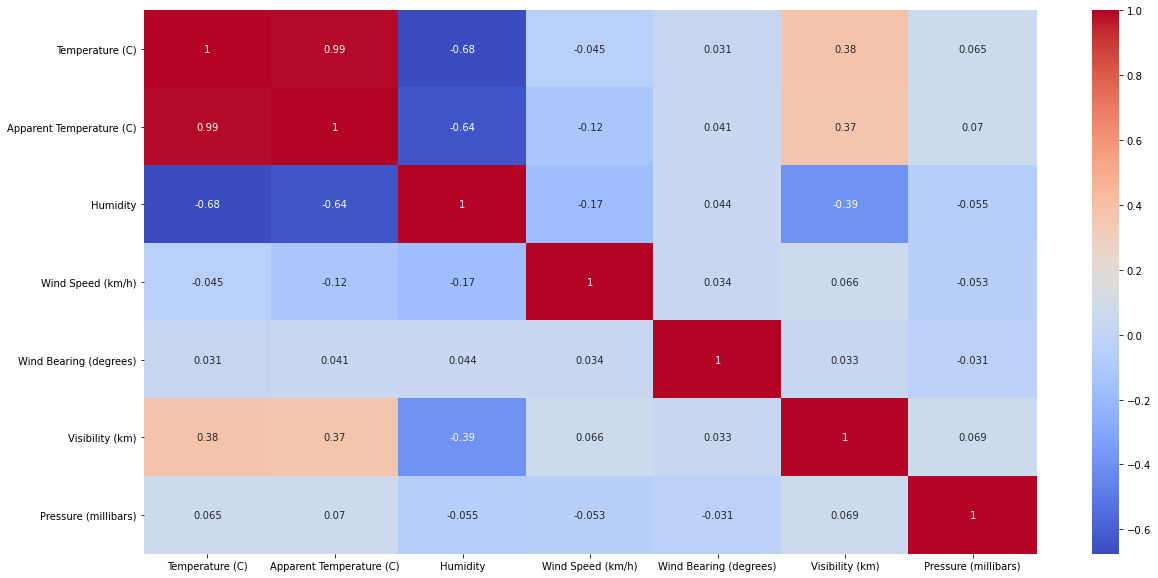

In [134]:
plt.figure(figsize=[20,10])
sns.heatmap(h.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.38
- Wind Bearing and Wind Speed : 0.034

<b>Negative Correlation</b>

- Pressure and Humidity : -0.055

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in the pressure humidity decreased in 2013.

## Analysis of year 2014

In [135]:
i = df[df['Year'] == '2014']
i.shape

(8757, 11)

In [136]:
i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8757 entries, 70152 to 78908
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8757 non-null   object 
 1   Summary                   8757 non-null   object 
 2   Precip Type               8757 non-null   object 
 3   Temperature (C)           8757 non-null   float64
 4   Apparent Temperature (C)  8757 non-null   float64
 5   Humidity                  8757 non-null   float64
 6   Wind Speed (km/h)         8757 non-null   float64
 7   Wind Bearing (degrees)    8757 non-null   int64  
 8   Visibility (km)           8757 non-null   float64
 9   Pressure (millibars)      8757 non-null   float64
 10  Daily Summary             8757 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.0+ KB


In [137]:
i.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000
mean,12.529737,11.628703,0.748578,10.502473,178.226219,11.320806,987.394676
std,8.181327,9.267807,0.183553,6.679484,104.511680,4.586403,167.281651
min,-13.255556,-19.472222,0.180000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,4.866667,0.640000,5.457900,110.000000,9.096500,1011.190000
50%,12.355556,12.355556,0.800000,9.853200,160.000000,10.352300,1014.990000
75%,18.344444,18.344444,0.900000,13.846000,280.000000,15.697500,1019.470000
max,33.911111,35.094444,1.000000,54.884900,359.000000,16.100000,1039.130000


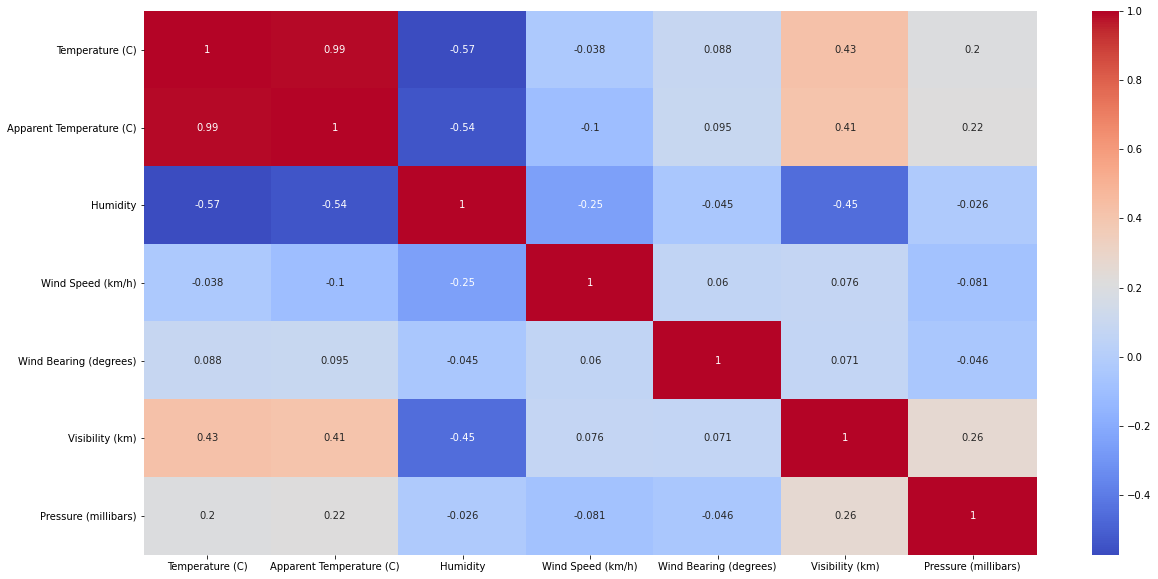

In [138]:
plt.figure(figsize=[20,10])
sns.heatmap(i.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.43
- Wind Bearing and Wind Speed : 0.06

<b>Negative Correlation</b>

- Pressure and Humidity : -0.026

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in the pressure  humidity decreased in 2014.

## Analysis of year 2015

In [139]:
j = df[df['Year']=='2015']
j.shape

(8760, 11)

In [140]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 78909 to 87668
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   int64  
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [141]:
j.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.311370,11.340911,0.732355,10.735247,184.098174,10.912786,1005.179401
std,9.367783,10.401825,0.200232,7.070953,112.159916,5.092462,116.754195
min,-13.066667,-14.644444,0.180000,0.000000,0.000000,0.000000,0.000000
25%,4.433333,2.627778,0.590000,5.357275,95.000000,7.486500,1013.290000
50%,12.055556,12.055556,0.780000,9.788800,180.000000,10.352300,1017.520000
75%,18.911111,18.911111,0.900000,14.055300,292.000000,15.826300,1023.442500
max,37.194444,37.783333,1.000000,46.609500,359.000000,16.100000,1042.380000


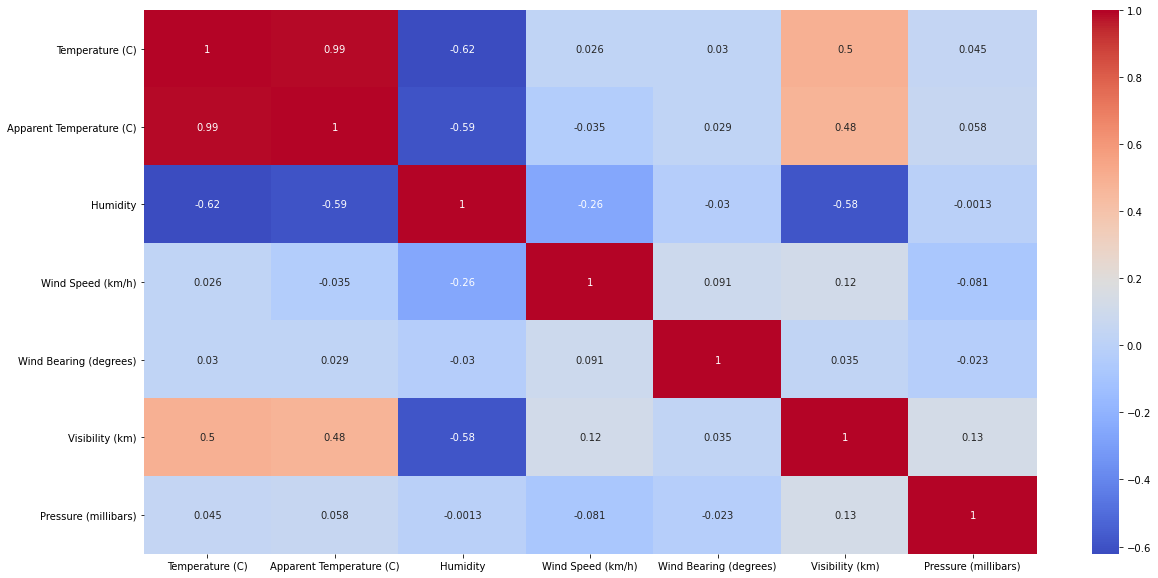

In [142]:
plt.figure(figsize=[20,10])
sns.heatmap(j.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.5
- Wind Bearing and Wind Speed : 0.091

<b>Negative Correlation</b>

- Pressure and Humidity : -0.013

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in the pressure  humidity decreased in 2015.

## Analysis of year 2016

In [143]:
k = df[df['Year'] == '2016']
k.shape

(8784, 11)

In [144]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 87669 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8410 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   int64  
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 823.5+ KB


In [145]:
k.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.985292,10.832629,0.760874,10.703441,185.438069,11.249668,1015.162161
std,9.031028,10.232430,0.182259,6.148946,101.045234,4.550629,34.916543
min,-10.133333,-17.222222,0.230000,0.000000,0.000000,0.000000,0.000000
25%,4.788889,2.255556,0.650000,6.359500,132.000000,8.404200,1012.900000
50%,11.086111,11.086111,0.810000,10.062500,175.000000,10.352300,1017.080000
75%,18.800000,18.800000,0.900000,13.894300,275.000000,15.649200,1019.980000
max,34.811111,37.005556,1.000000,38.833200,359.000000,16.100000,1038.010000


In [146]:
temp_range_2016 = k['Temperature (C)'].max() - k['Temperature (C)'].min()
temp_range_2016

44.94444444

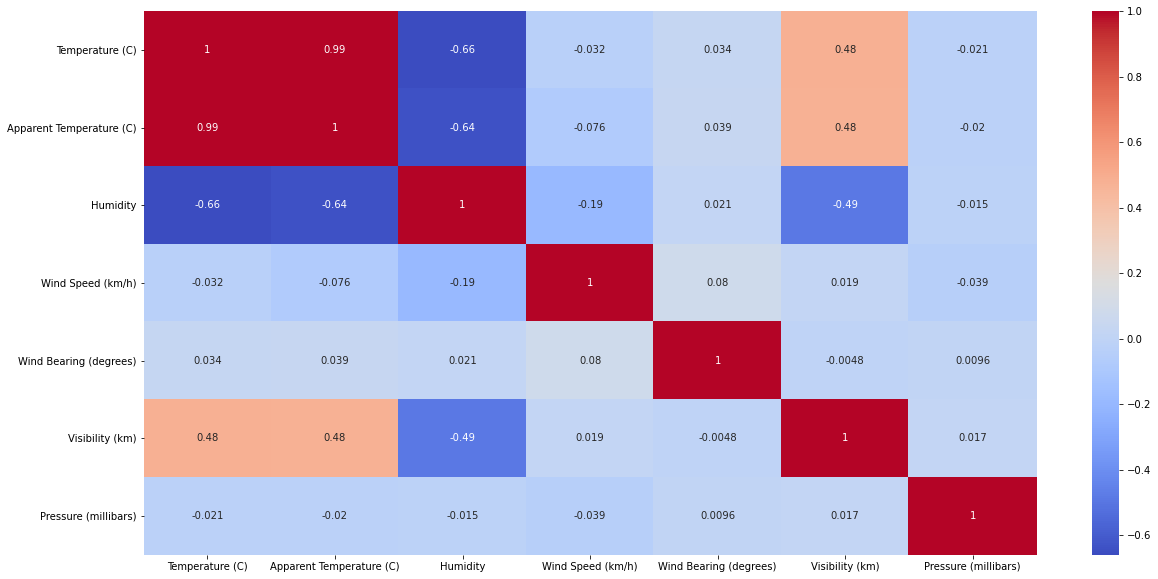

In [147]:
plt.figure(figsize=[20,10])
sns.heatmap(k.corr(),cmap='coolwarm',annot=True)

### Observations:

<b>Positive Correlation</b>

- Visibility and Temperature : 0.48
- Wind Bearing and Wind Speed : 0.039

<b>Negative Correlation</b>

- Pressure and Humidity : -0.015

The positive relationship shows that with the increase in the temperature there is a increase in visibility. Similarly for Wind speed and wind bearing which shows that as the wind speed increase direction of the wind changes.

The negative relationship shows that with increase in the pressure  humidity decreased in 2016.

## Analysis from 2006 to 2016

In [171]:
x = [a,b,c,d,e,f,g,h,i,j,k]
max_temp = []
min_temp = []
avg_temp = []
for i in x:
    #print(i['Temperature (C)'].max())
    max_temp.append(i['Temperature (C)'].max())
    min_temp.append(i['Temperature (C)'].min())
    avg_temp.append(i['Temperature (C)'].mean())

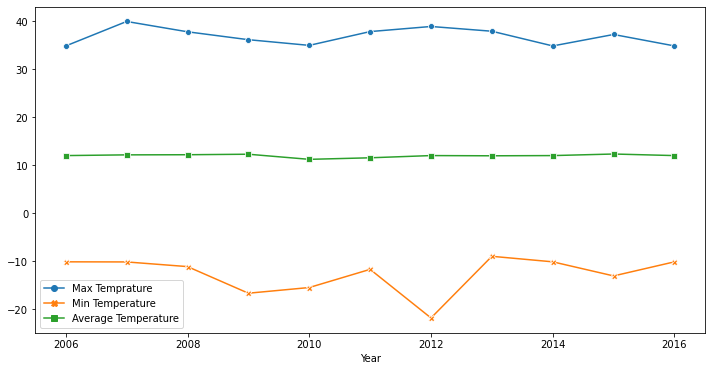

In [173]:
year_list=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(12,6))
sns.lineplot(data=pd.DataFrame({'Year':year_list,'Max Temprature':max_temp,'Min Temperature':min_temp,
                                'Average Temperature':avg_temp}).set_index('Year'),markers=True, dashes=False)

### Coclusion

The graph clearly shows the maximum, minimum and average temperature from year 2006 to 2016. From the graph it is clear that there is big drop in the temperature in the year 2012 while the maximum temperature that was noted was in the year 2007. Graph clearly states that the average temperature remained the same from 2006 to 2016.